In [1]:
import numpy as np
import utils
from itertools import product
from SGA import Mutation, Crossover, simple_genetic_algorithm

In [2]:
def get_values(gen):
	return [v for c, v in gen]

In [3]:
# BERLIN52

n = 52
coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]

def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

In [4]:
mutations = [
	("IM", Mutation.insertion),
	("RSM", Mutation.reverse_sequence_mutation),
	("SSM", Mutation.shift_sequence)
]

crossovers = [
	("OX", Crossover.ordered),
	("PMX", Crossover.PMX),
	("PBX", Crossover.position_based)
]

In [8]:
values = []
legend = []

for (prefix, mutation), (sufix, crossover) in product(mutations, crossovers):
	legend.append(f"{prefix}+{sufix}")
	values.append(get_values(
		simple_genetic_algorithm(n, crossover, mutation, tsp_objective_function)
	))

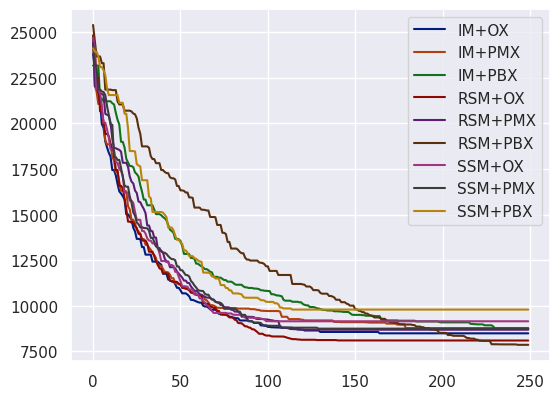

<Figure size 640x480 with 0 Axes>

In [10]:
utils.quickplot(*values, legend=legend)